# Step 1: Data Collection

## Import Libraries

In [1]:
import csv
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [2]:
def load_and_inspect_data(file_path):

    df = pd.read_csv(file_path)
    
    print("First five rows of the dataset:")
    print(df.head(), "\n")
    print("*" * 40)
    print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
    print("*" * 40)
    print("Checking for missing values:")
    print(df.isnull().sum(), "\n")
    print("*" * 40)
    print("Dataset information:")
    print(df.info(), "\n")
    print("*" * 40)
    print("Basic statistics of the dataset:")
    print(df.describe(include='all'), "\n")
    print("*" * 40)
    return df

file_path = 'bbc-text.csv' 
df = load_and_inspect_data(file_path)


First five rows of the dataset:
        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve... 

****************************************
Dataset contains 2225 rows and 2 columns.

****************************************
Checking for missing values:
category    0
text        0
dtype: int64 

****************************************
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [3]:
initial_shape =df.shape

In [4]:
print("Dataset shape before removing duplicates: ", initial_shape)

Dataset shape before removing duplicates:  (2225, 2)


In [5]:
df=df.drop_duplicates(subset='text').reset_index(drop=True)

In [6]:
new_shape = df.shape

In [7]:
print("Dataset shape after removing duplicates:", new_shape)

Dataset shape after removing duplicates: (2126, 2)


In [8]:
print("Number of duplicates removed:", initial_shape[0] - new_shape[0])

Number of duplicates removed: 99


In [9]:
df.reset_index(drop=True, inplace=True)

## Exploring The Distribution Of Categories.

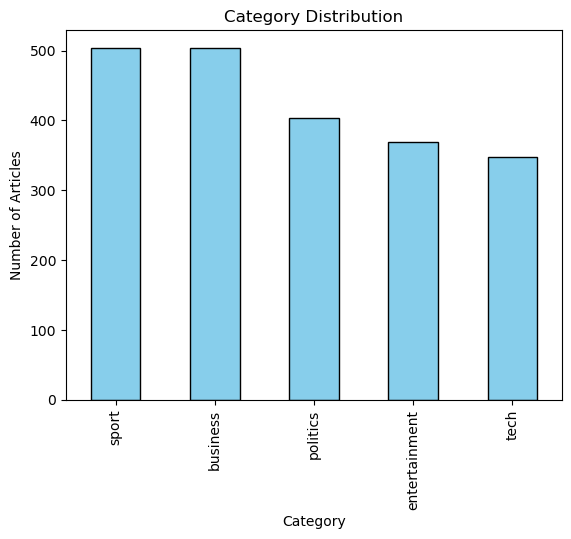

In [10]:
category_counts = df['category'].value_counts()
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

In [11]:
print("Category counts:\n", category_counts)

Category counts:
 category
sport            504
business         503
politics         403
entertainment    369
tech             347
Name: count, dtype: int64


In [12]:
print("Category proportions:\n", category_counts / len(df) * 100)

Category proportions:
 category
sport            23.706491
business         23.659454
politics         18.955786
entertainment    17.356538
tech             16.321731
Name: count, dtype: float64


# Step 2: Data Preprocessing and Exploratory Data Analysis 
- Text Cleaning: Remove noise from your text data, such as HTML tags, special characters, and extra spaces.
- Tokenization: Split the text into words or tokens ,Tokenization breaks down the cleaned text into individual words or "tokens." This step is crucial because it allows us to analyze the frequency and meaning of each word individually.
- Lowercasing: Convert all text to lowercase to maintain uniformity.
- Stop Words Removal: Remove common words (e.g., "and," "the") that may not carry significant meaning.
- Stemming/Lemmatization: Reduce words to their base or root form.

In [13]:
# # Download NLTK stopwords and wordnet for lemmatization
# nltk.download('stopwords')
# nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\5adamaty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\5adamaty\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

##### Stop Word Analysis
- Let's find out all the stop words like a,the,or etc and plot them

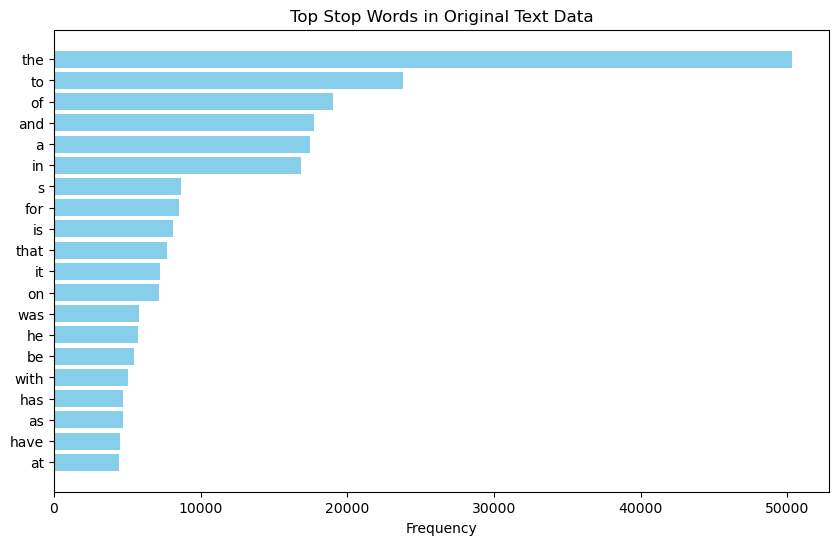

In [15]:
stop_words_in_text = df['text'].apply(lambda x: [word.lower() for word in x.split() if word.lower() in stop_words])
stop_word_counts = Counter([word for sublist in stop_words_in_text for word in sublist])

# Plotting if there are stop words found
if stop_word_counts:
    top_n = 20  # Adjust the number of words displayed if desired
    common_stop_words = stop_word_counts.most_common(top_n)
    words, counts = zip(*common_stop_words)

    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title('Top Stop Words in Original Text Data')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("No stop words found in the dataset.")


##### Cleaning the Text

In [16]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove numbers 
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

# Apply cleaning function
df['cleaned_text'] = df['text'].apply(clean_text)


- ##### Check the first few rows to ensure cleaning

In [17]:
df[['text', 'cleaned_text']].head()

,text,cleaned_text
0,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...
1,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...
2,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...
3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...


- ##### To display the entire content of text columns without being cut off.

In [18]:
pd.set_option('display.max_colwidth', None)

In [19]:
print(df[['text', 'cleaned_text']].head(10))

##### Text Normalization with Lemmatization
- Lemmatization is performed to reduce words to their root form, further normalizing the text.

In [20]:
def preprocess_text(text):
    # Tokenize: Split text into words
    tokens = re.findall(r'\b\w+\b', text.lower())
    
    # Remove stop words and lemmatize each word
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Join tokens back to text
    return ' '.join(processed_tokens)

# Apply normalization
df['normalized_text'] = df['cleaned_text'].apply(preprocess_text)


In [21]:
pd.reset_option('display.max_colwidth')

In [22]:
df[['text', 'cleaned_text', 'normalized_text']].head(10)

,text,cleaned_text,normalized_text
0,tv future in the hands of viewers with home th...,tv future hands viewers home theatre systems p...,tv future hand viewer home theatre system plas...
1,worldcom boss left books alone former worldc...,worldcom boss left books alone former worldcom...,worldcom bos left book alone former worldcom b...
2,tigers wary of farrell gamble leicester say ...,tigers wary farrell gamble leicester say rushe...,tiger wary farrell gamble leicester say rushed...
3,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...,yeading face newcastle fa cup premiership side...
4,ocean s twelve raids box office ocean s twelve...,ocean twelve raids box office ocean twelve cri...,ocean twelve raid box office ocean twelve crim...
5,howard hits back at mongrel jibe michael howar...,howard hits back mongrel jibe michael howard s...,howard hit back mongrel jibe michael howard sa...
6,blair prepares to name poll date tony blair is...,blair prepares name poll date tony blair likel...,blair prepares name poll date tony blair likel...
7,henman hopes ended in dubai third seed tim hen...,henman hopes ended dubai third seed tim henman...,henman hope ended dubai third seed tim henman ...
8,wilkinson fit to face edinburgh england captai...,wilkinson fit face edinburgh england captain j...,wilkinson fit face edinburgh england captain j...
9,last star wars not for children the sixth an...,last star wars children sixth final star wars ...,last star war child sixth final star war movie...


##### Feature Extraction with CountVectorizer
- This step uses CountVectorizer to convert the normalized text into a matrix of token counts.

In [23]:
vectorizer = CountVectorizer(stop_words='english')

# Transform the 'normalized_text' to a document-term matrix
word_counts = vectorizer.fit_transform(df['normalized_text'])

# Create a DataFrame from the document-term matrix
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())
word_counts_df['category'] = df['category'].values


#####  Extracting Top Words by Category
- This function finds the top n most common words within each category, which can help in EDA and feature understanding.

In [24]:
def get_top_words_by_category(df, category_col, n=10):
    top_words = {}
    categories = df[category_col].unique()
    
    for category in categories:
        category_df = df[df[category_col] == category]
        
        word_sums = category_df.drop(columns=[category_col]).sum(axis=0)
        
        top_words[category] = word_sums.nlargest(n).index.tolist()
    
    return top_words

top_words_by_category = get_top_words_by_category(word_counts_df, 'category', n=10)

# Display top words for each category
for category, top_words in top_words_by_category.items():
    print(f"Top words for '{category}': {top_words}")


Top words for 'tech': ['said', 'people', 'game', 'technology', 'mobile', 'phone', 'mr', 'new', 'year', 'service']
Top words for 'business': ['said', 'year', 'bn', 'company', 'mr', 'firm', 'market', 'sale', 'bank', 'new']
Top words for 'sport': ['said', 'game', 'player', 'win', 'england', 'year', 'time', 'world', 'match', 'play']
Top words for 'entertainment': ['film', 'said', 'year', 'best', 'award', 'music', 'new', 'star', 'actor', 'band']
Top words for 'politics': ['said', 'mr', 'labour', 'government', 'party', 'people', 'election', 'minister', 'blair', 'tory']


- Visualization of Top Words by Category

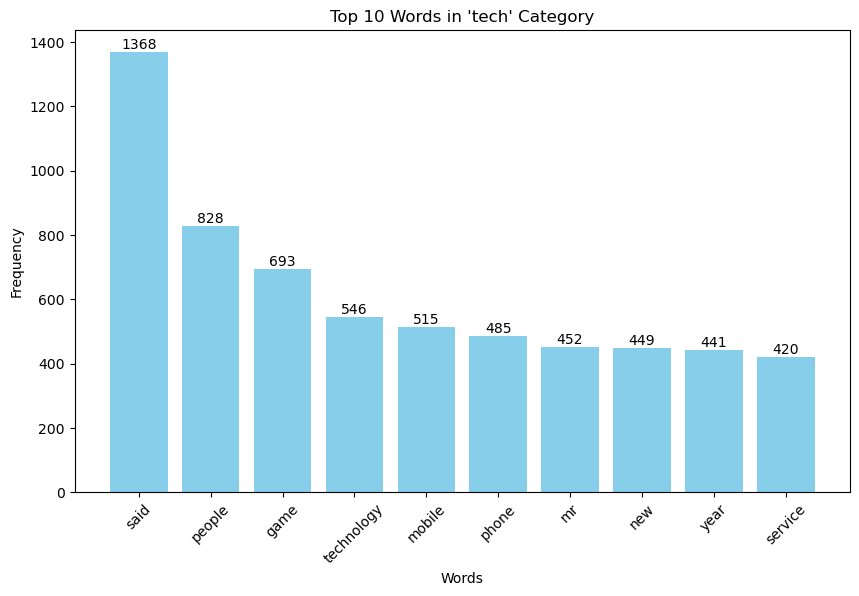

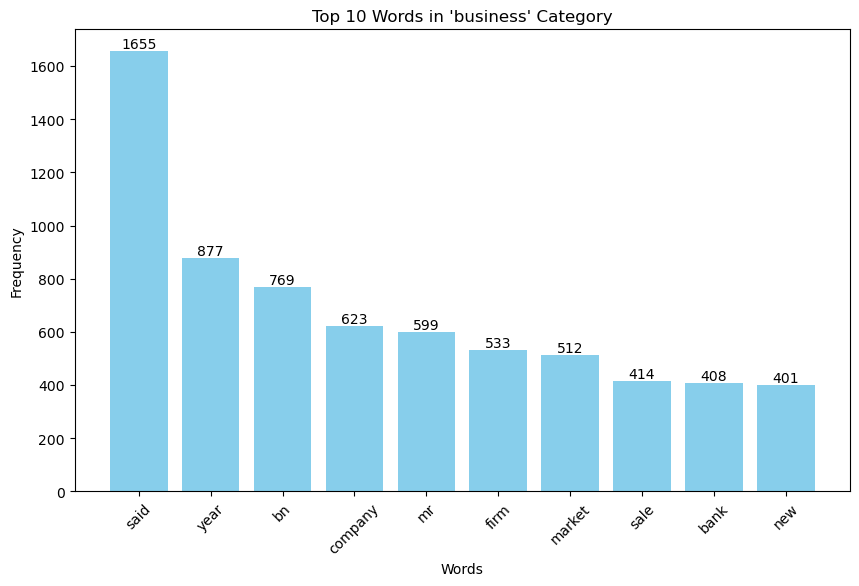

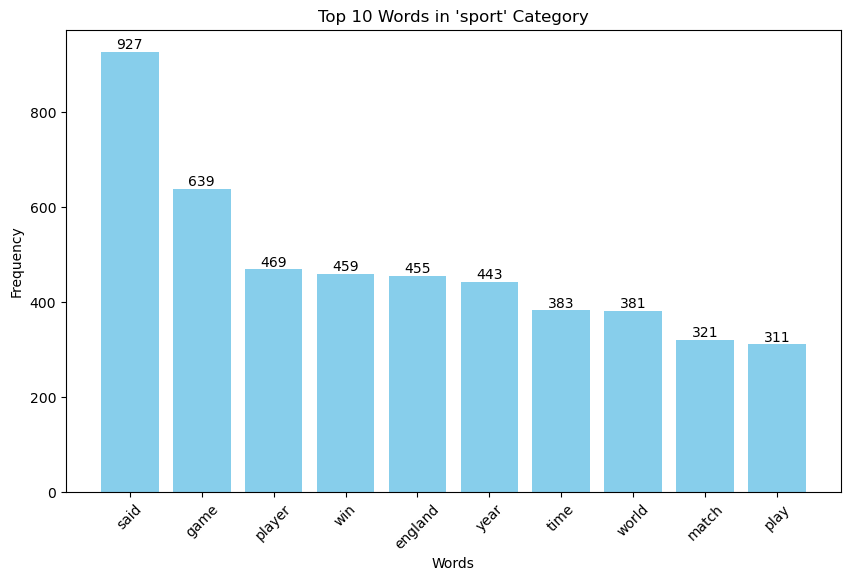

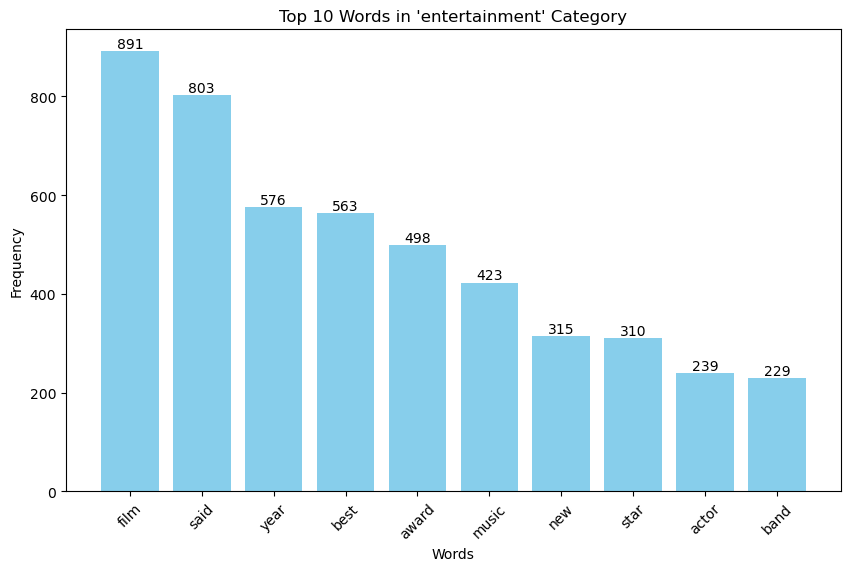

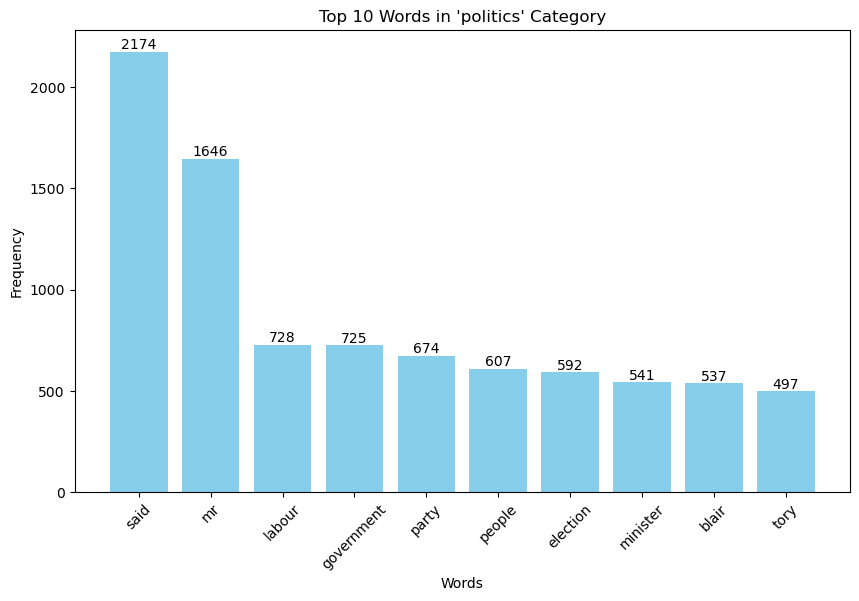

In [25]:
def plot_top_words(top_words_by_category, word_counts_df, n=10):
    for category, top_words in top_words_by_category.items():
        category_df = word_counts_df[word_counts_df['category'] == category][top_words]
        
        word_frequencies = category_df.sum().sort_values(ascending=False)[:n]
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(word_frequencies.index, word_frequencies.values, color='skyblue')
        plt.title(f"Top {n} Words in '{category}' Category")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.xticks(rotation=45)

        for bar in bars:
            yval = bar.get_height()
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                yval,
                int(yval),
                ha='center',
                va='bottom'
            )

        plt.show()

# Plot the top words for each category
plot_top_words(top_words_by_category, word_counts_df, n=10)


# Step 3: Feature Extraction
- I Decided to convert my text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency)

In [26]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,  # Adjust this as needed based on the dataset's size
    stop_words='english',  # Remove English stop words automatically
    ngram_range=(1, 2)     # Consider both unigrams and bigrams
)

# Step 2: Fit and transform the 'cleaned_text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Step 3: Convert the sparse matrix to a DataFrame (optional for exploration)
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)

# Display the resulting DataFrame with TF-IDF features
print("TF-IDF Feature Matrix:")
print(tfidf_df.head())


TF-IDF Feature Matrix:
   aaas  abandoned  abc  ability  able  abn  abortion  abroad  absence  \
0   0.0        0.0  0.0      0.0   0.0  0.0       0.0     0.0      0.0   
1   0.0        0.0  0.0      0.0   0.0  0.0       0.0     0.0      0.0   
2   0.0        0.0  0.0      0.0   0.0  0.0       0.0     0.0      0.0   
3   0.0        0.0  0.0      0.0   0.0  0.0       0.0     0.0      0.0   
4   0.0        0.0  0.0      0.0   0.0  0.0       0.0     0.0      0.0   

   absolute  ...  young people   younger  youth  yuan  yugansk  \
0       0.0  ...           0.0  0.046409    0.0   0.0      0.0   
1       0.0  ...           0.0  0.000000    0.0   0.0      0.0   
2       0.0  ...           0.0  0.000000    0.0   0.0      0.0   
3       0.0  ...           0.0  0.000000    0.0   0.0      0.0   
4       0.0  ...           0.0  0.000000    0.0   0.0      0.0   

   yuganskneftegas  yukos  yushchenko  zealand  zone  
0              0.0    0.0         0.0      0.0   0.0  
1              0.0    0.0

-  Check Sparsity of the TF-IDF  : TF-IDF matrices are often sparse, which can impact memory and model performance. Checking sparsity gives you a sense of how efficiently the matrix represents the data.

In [27]:
sparsity = 1.0 - (tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1]))
print(f"Sparsity of the TF-IDF matrix: {sparsity * 100:.2f}%")

Sparsity of the TF-IDF matrix: 97.77%


- Examine Important Words by Category:

In [28]:
tfidf_df['category'] = df['category']

category_means = tfidf_df.groupby('category').mean()

for category in category_means.index:
    print(f"\nTop words for '{category}' category:")
    print(category_means.loc[category].nlargest(10))



Top words for 'business' category:
bn         0.053798
said       0.049740
growth     0.032664
economy    0.031166
bank       0.030926
company    0.030587
market     0.030388
year       0.029780
sales      0.028749
firm       0.028067
Name: business, dtype: float64

Top words for 'entertainment' category:
film        0.085850
best        0.046028
music       0.038425
said        0.036088
awards      0.033995
band        0.032290
award       0.031209
festival    0.028256
album       0.027205
tv          0.026789
Name: entertainment, dtype: float64

Top words for 'politics' category:
mr            0.082698
said          0.065953
labour        0.062232
blair         0.049724
election      0.049638
party         0.046459
government    0.045664
brown         0.035246
minister      0.032495
howard        0.031216
Name: politics, dtype: float64

Top words for 'sport' category:
england    0.036447
game       0.035814
win        0.032007
said       0.031846
cup        0.029123
match      0.026

- Label

In [29]:
label_encoder = LabelEncoder()
df['category'] = label_encoder.fit_transform(df['category'])
print(df)

      category                                               text  \
0            4  tv future in the hands of viewers with home th...   
1            0  worldcom boss  left books alone  former worldc...   
2            3  tigers wary of farrell  gamble  leicester say ...   
3            3  yeading face newcastle in fa cup premiership s...   
4            1  ocean s twelve raids box office ocean s twelve...   
...        ...                                                ...   
2121         0  cars pull down us retail figures us retail sal...   
2122         2  kilroy unveils immigration policy ex-chatshow ...   
2123         1  rem announce new glasgow concert us band rem h...   
2124         2  how political squabbles snowball it s become c...   
2125         3  souness delight at euro progress boss graeme s...   

                                           cleaned_text  \
0     tv future hands viewers home theatre systems p...   
1     worldcom boss left books alone former worldcom.

In [30]:
x = tfidf_matrix 
y = df['category'] 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

print("Training features shape:", x_train.shape)
print("Testing features shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (1700, 5000)
Testing features shape: (426, 5000)
Training labels shape: (1700,)
Testing labels shape: (426,)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder , StandardScaler , MinMaxScaler , RobustScaler , PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score , recall_score ,f1_score, precision_score , confusion_matrix , ConfusionMatrixDisplay , classification_report

In [32]:
models = [
    ('lr' , LogisticRegression()),
    ('NB'   ,  MultinomialNB()),
    ('SVC' , SVC(kernel='linear')),
    ('RFC' , RandomForestClassifier()),
    ('GB' , GradientBoostingClassifier()),
    ('XGB' , XGBClassifier())
]

lr
Train
Train Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       295
           2       0.99      0.99      0.99       322
           3       1.00      1.00      1.00       403
           4       0.99      0.99      0.99       278

    accuracy                           1.00      1700
   macro avg       0.99      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

****************************************
Test
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       101
           1       1.00      0.96      0.98        74
           2       0.99      0.98      0.98        81
           3       0.99      1.00      1.00       101
           4       0.98      0.94      0.96        69

    accuracy                           0.97       426
   macro avg       0.98      0.97      0.97   

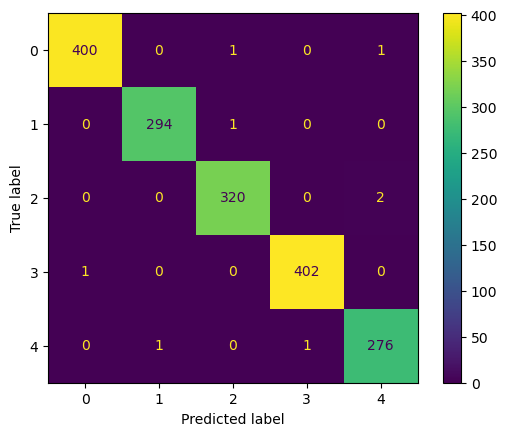

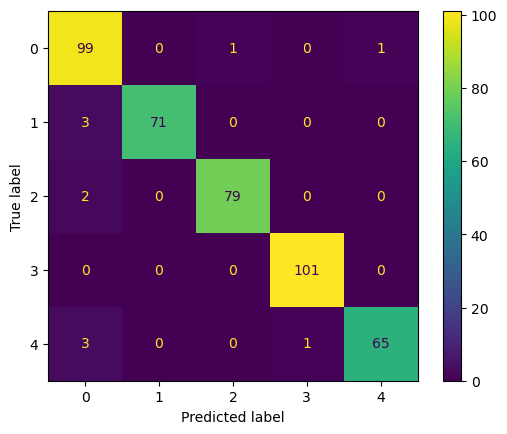

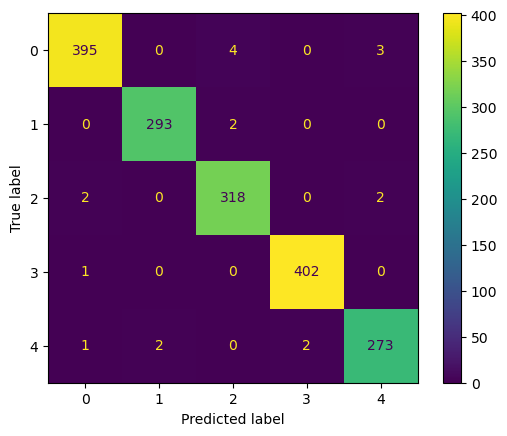

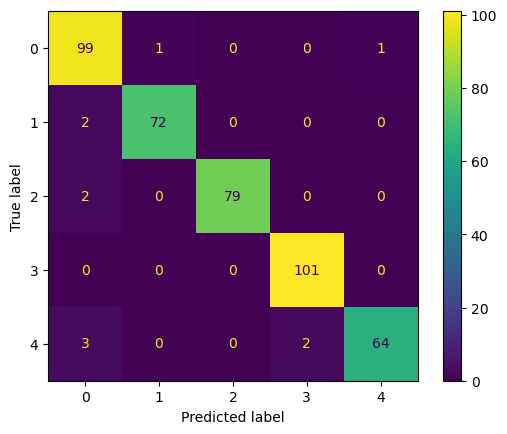

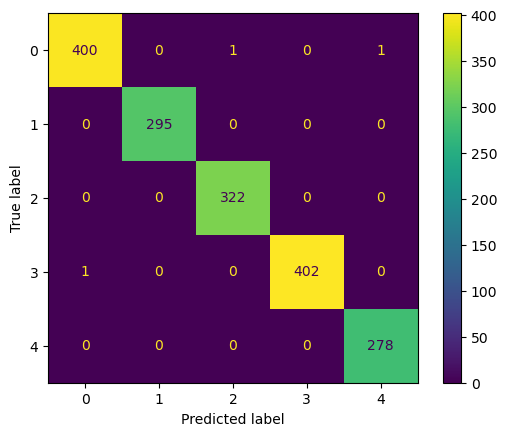

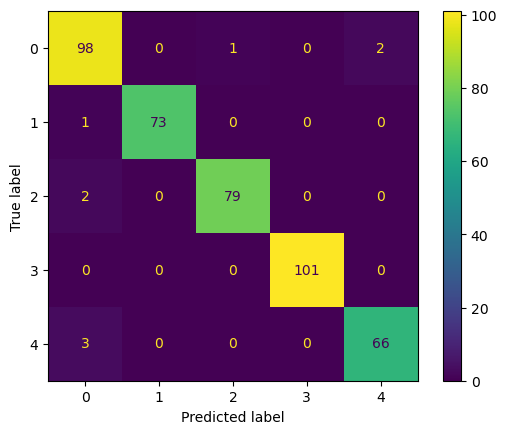

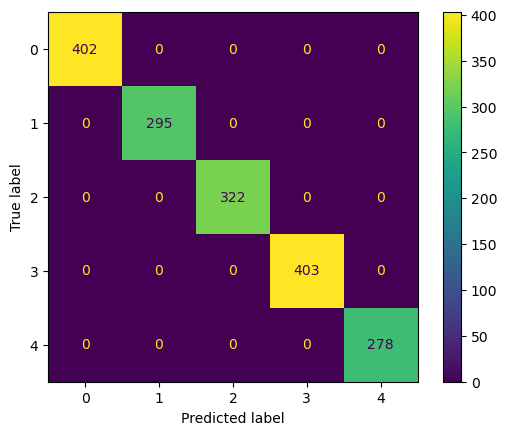

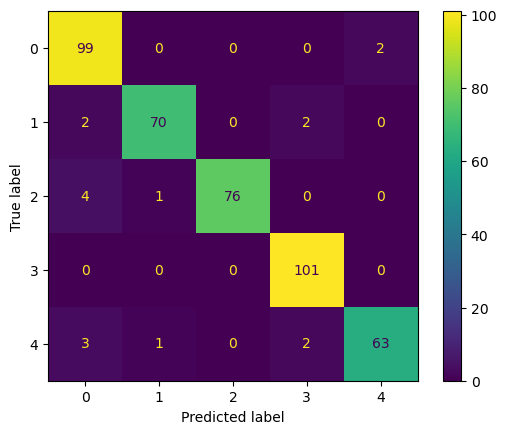

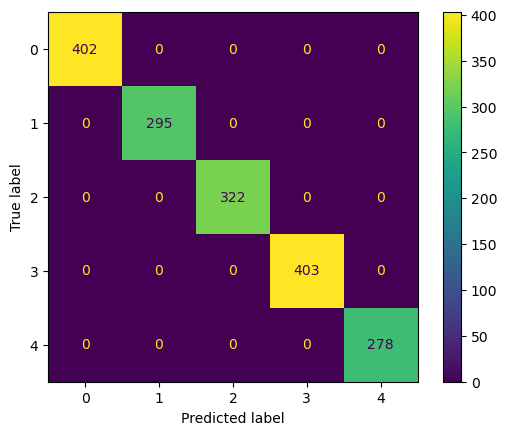

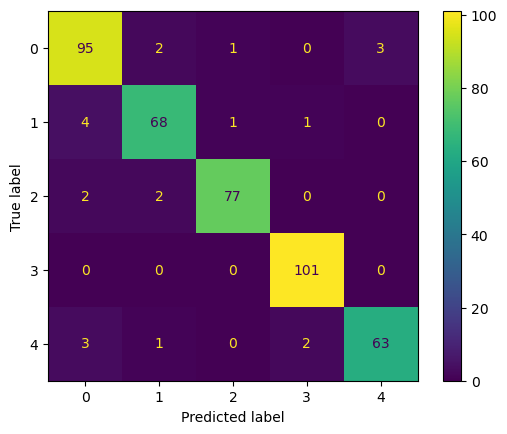

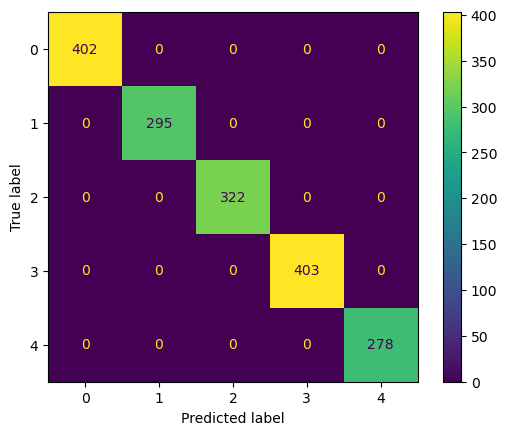

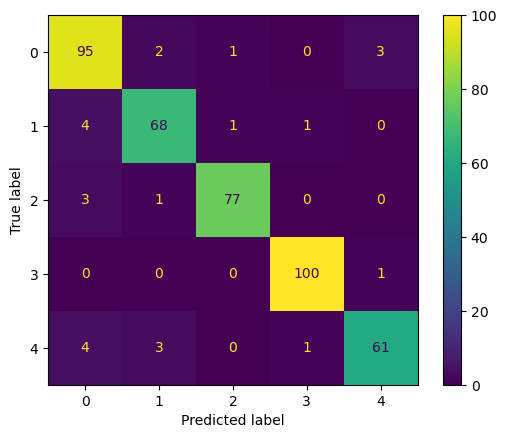

In [33]:
for model in models :
    
    model[1].fit(x_train , y_train)
    
    
    y_train_prd = model[1].predict(x_train)
    y_test_prd = model[1].predict(x_test)
    
    print(model[0])
    print('Train')
    print('Train Classification Report:\n', classification_report(y_train, y_train_prd))
    
    print('*'*40)
    
    print('Test')
    print(classification_report(y_test , y_test_prd)) 
    
    print('*'*40)

    print('Train acc : ' , accuracy_score(y_train , y_train_prd))
    print('Test acc :' , accuracy_score(y_test , y_test_prd))
    print('*'*40)
    print('Train Recall Score (weighted):',recall_score(y_train , y_train_prd, average='weighted' ))
    print('Test Recall Score (weighted):',recall_score(y_test , y_test_prd ,average='weighted' ))

    print('*'*40)
    print('Train Precision Score (weighted):', precision_score(y_train, y_train_prd, average='weighted'))
    print('Test Precision Score (weighted):' ,precision_score(y_test , y_test_prd, average='weighted' ))
    print('*'*40)
    
    print('Train F1 Score (weighted):', f1_score(y_train, y_train_prd, average='weighted'))
    print('Test F1 Score (weighted):', f1_score(y_test , y_test_prd ,average='weighted'))
    print('*'*40)

    ConfusionMatrixDisplay(confusion_matrix(y_train , y_train_prd)).plot()
    ConfusionMatrixDisplay(confusion_matrix(y_test , y_test_prd)).plot()
    
    print('*'*40)

- ### Cross-Validation and Hyperparameter Tuning for Logistic Regression

In [34]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],    # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Solvers for logistic regression
    'max_iter': [100, 200, 300]       # Maximum iterations
}

log_reg = LogisticRegression()

grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

best_log_reg = grid_search.best_estimator_

Best parameters found:  {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
Best cross-validation score: 0.98


- ### Saving the Model and Tokenizer with Pickle

In [35]:
import pickle

In [40]:
with open('logistic_regression_model.pkl', 'wb') as model_file:
    pickle.dump(best_log_reg, model_file)

with open('tokenizer.pkl', 'wb') as tokenizer_file:
    pickle.dump(tfidf_vectorizer, tokenizer_file)

with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

print("Model and tokenizer saved successfully.")

Model and tokenizer saved successfully.
